In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
covid=pd.read_csv("/content/drive/My Drive/project/data/covid_19_data.csv")
covid

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
25954,25955,05/17/2020,Wyoming,US,2020-05-18 02:32:21,754.0,8.0,0.0
25955,25956,05/17/2020,Xinjiang,Mainland China,2020-05-18 02:32:21,76.0,3.0,73.0
25956,25957,05/17/2020,Yukon,Canada,2020-05-18 02:32:21,11.0,0.0,11.0
25957,25958,05/17/2020,Yunnan,Mainland China,2020-05-18 02:32:21,185.0,2.0,183.0


In [3]:
covid.drop(["SNo"],1,inplace=True)
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])
covid_data = covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
covid_data["Active Cases"] = covid_data["Confirmed"]-covid_data["Recovered"]-covid_data["Deaths"]
covid_data["Days Since"] = covid_data.index - covid_data.index.min()
covid_data["Days Since"]=covid_data.index-covid_data.index[0]
covid_data["Days Since"]=covid_data["Days Since"].dt.days
covid_data

,Confirmed,Recovered,Deaths,Active Cases,Days Since
ObservationDate,,,,,
2020-01-22,555.0,28.0,17.0,510.0,0
2020-01-23,653.0,30.0,18.0,605.0,1
2020-01-24,941.0,36.0,26.0,879.0,2
2020-01-25,1438.0,39.0,42.0,1357.0,3
2020-01-26,2118.0,52.0,56.0,2010.0,4
...,...,...,...,...,...
2020-05-13,4347018.0,1548547.0,297197.0,2501274.0,112
2020-05-14,4442163.0,1587893.0,302418.0,2551852.0,113
2020-05-15,4542347.0,1637067.0,307666.0,2597614.0,114


## Preprocessing / Dataset

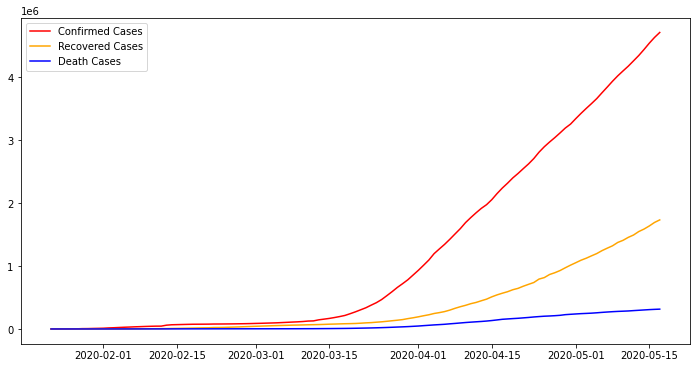

In [4]:
plt.figure(figsize=(12,6))
plt.plot(covid_data["Confirmed"],label="Confirmed Cases", color='red')
plt.plot(covid_data["Recovered"],label="Recovered Cases", color='orange')
plt.plot(covid_data["Deaths"],label="Death Cases", color='blue')
plt.legend()

Text(0.5, 1.0, 'Distribution Plot for Confirmed over Date')

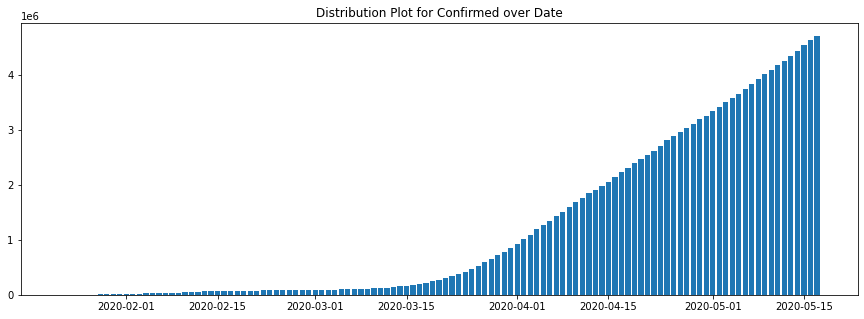

In [6]:
plt.figure(figsize=(15,5))
plt.bar(covid_data.index.date, covid_data["Confirmed"])
plt.title("Distribution Plot for Confirmed over Date")

Text(0.5, 1.0, 'Distribution Plot for Active Cases over Date')

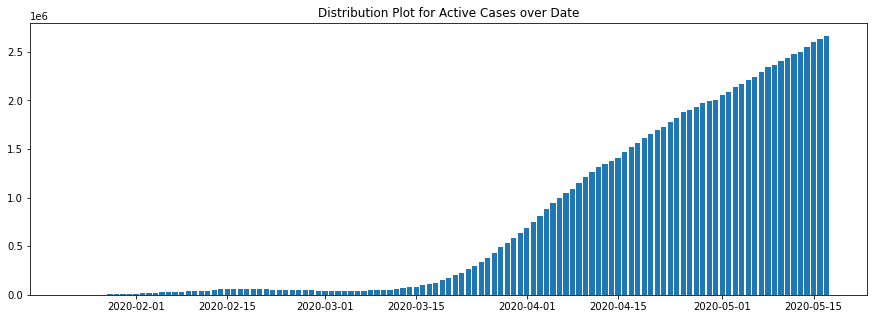

In [7]:
plt.figure(figsize=(15,5))
plt.bar(covid_data.index.date, covid_data["Active Cases"])
plt.title("Distribution Plot for Active Cases over Date")

## Prediction using Machine Learning Models

#### Linear Regression Model for Confirm Cases Prediction

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [0]:
model_Linear = linear_model.LinearRegression(normalize=True)

In [0]:
x_days_train, x_days_test, y_confirmed_train, y_confirmed_test = train_test_split(covid_data["Days Since"],covid_data["Confirmed"],test_size=0.2, shuffle=False)

In [11]:
model_Linear.fit(np.array(x_days_train).reshape(-1,1), np.array(y_confirmed_train).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
model_scores = []

In [13]:
y_confirmed_pred = model_Linear.predict(np.array(x_days_test).reshape(-1,1))
model_scores.append(np.sqrt(mean_squared_error(y_confirmed_test,y_confirmed_pred)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(y_confirmed_test,y_confirmed_pred)))

Root Mean Square Error for Linear Regression:  1772046.963394283


Root Mean Square Error for Linear Regression:  1772046.963394283


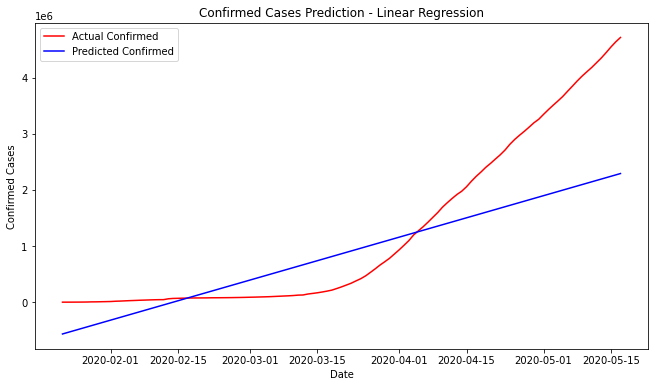

In [14]:
plt.figure(figsize=(11,6))
prediction_linreg=model_Linear.predict(np.array(covid_data["Days Since"]).reshape(-1,1))
plt.plot(covid_data["Confirmed"],label="Actual Confirmed", color='red')
plt.plot(covid_data.index,prediction_linreg,label="Predicted Confirmed",color='blue')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Prediction - Linear Regression")
plt.legend()
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(y_confirmed_test,y_confirmed_pred)))

#### Polynomial Regression for Prediction of Confirmed Cases

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
train_ml=covid_data.iloc[:int(covid_data.shape[0]*0.8)]
valid_ml=covid_data.iloc[int(covid_data.shape[0]*0.8):]

In [0]:
model_Polynomial = PolynomialFeatures(degree = 4) 

In [0]:
train_poly=model_Polynomial.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=model_Polynomial.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [19]:
linreg=linear_model.LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [20]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  687970.1216172318


Root Mean Squared Error for Polynomial Regression:  687970.1216172318


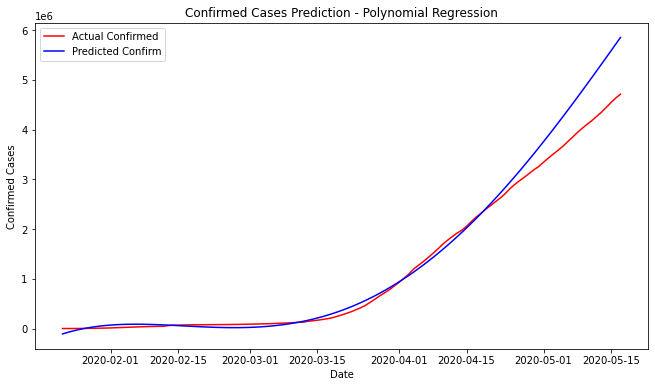

In [21]:
comp_data=model_Polynomial.fit_transform(np.array(covid_data["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)
plt.plot(covid_data["Confirmed"],label="Actual Confirmed",color='red')
plt.plot(covid_data.index,predictions_poly,label="Predicted Confirm",color='blue')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Prediction - Polynomial Regression")
plt.legend()
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

**RNN -> LSTM and GRU**

In [22]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from numpy import newaxis, zeros
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
numpy.random.seed(7)

In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [0]:
covid_data["Days Since"].shape
covid_data["Confirmed"]
New_Data = pd.concat([covid_data["Confirmed"],covid_data["Days Since"]],axis='columns')
New_Data = np.array(covid_data["Confirmed"]).reshape(-1,1)
Re_data = New_Data
dataset = New_Data.astype('float32')

In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [27]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

93 24


In [0]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [0]:
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
# create and fit the LSTM network
model_LSTM = Sequential()
model_LSTM.add(LSTM(4, input_shape=(1, look_back)))
model_LSTM.add(Dense(1, activation="relu"))
model_LSTM.compile(loss='mean_squared_error', optimizer='adam')
model_LSTM.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0304
Epoch 2/100
 - 0s - loss: 0.0233
Epoch 3/100
 - 0s - loss: 0.0204
Epoch 4/100
 - 0s - loss: 0.0187
Epoch 5/100
 - 0s - loss: 0.0167
Epoch 6/100
 - 0s - loss: 0.0148
Epoch 7/100
 - 0s - loss: 0.0126
Epoch 8/100
 - 0s - loss: 0.0104
Epoch 9/100
 - 0s - loss: 0.0083
Epoch 10/100
 - 0s - loss: 0.0063
Epoch 11/100
 - 0s - loss: 0.0045
Epoch 12/100
 - 0s - loss: 0.0031
Epoch 13/100
 - 0s - loss: 0.0019
Epoch 14/100
 - 0s - loss: 0.0011
Epoch 15/100
 - 0s - loss: 5.9965e-04
Epoch 16/100
 - 0s - loss: 3.2492e-04
Epoch 17/100
 - 0s - loss: 1.6974e-04
Epoch 18/100
 - 0s - loss: 9.6750e-05
Epoch 19/100
 - 0s - loss: 6.7682e-05
Epoch 20/100
 - 0s - loss: 5.5158e-05
Epoch 21/100
 - 0s - loss: 5.2685e-05
Epoch 22/100
 - 0s - loss: 5.1355e-05
Epoch 23/100
 - 0s - loss: 5.1097e-05
Epoch 24/100
 - 0s - loss: 4.9938e-05
Epoch 25/100
 - 0s - loss: 5.0320e-05
Epoch 26/100
 - 0s - loss: 4.8063e-05
Epoch 27/100
 - 0s - loss: 4.8355e-05
Epoch 28/100
 - 0s - loss: 4.7308e-05
E

In [32]:
#  make prediction
trainPredict = model_LSTM.predict(trainX)
testPredict = model_LSTM.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# # calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
model_scores.append(testScore)

Train Score: 11976.42 RMSE
Test Score: 340920.33 RMSE


Root Mean Squared Error for LSTM model:  340920.32814989856


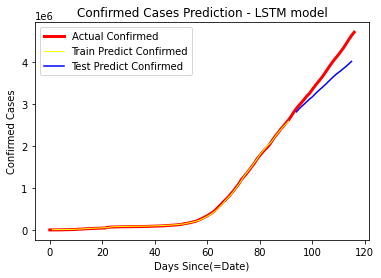

In [33]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# predictYPlot = numpy.empty_like(dataset)
# predictYPlot[:, :] = numpy.nan
# predictYPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = predictY
# plot baseline and predictions
# plt.plot(predictYPlot)

plt.plot(scaler.inverse_transform(dataset), label="Actual Confirmed", color='red',linewidth=3)
plt.plot(trainPredictPlot, label="Train Predict Confirmed", color='yellow', linewidth=1)
plt.plot(testPredictPlot, label="Test Predict Confirmed", color='blue')
plt.legend()
print("Root Mean Squared Error for LSTM model: ",testScore)
plt.xlabel('Days Since(=Date)')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Prediction - LSTM model")
plt.show()

In [0]:
from keras.layers import Flatten

In [0]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [37]:
model_GRU = Sequential()
model_GRU.add(GRU(1, return_sequences=True, input_shape=(1, look_back)))
model_GRU.add(Flatten())
# model_GRU.add(Dense(1))
model_GRU.compile(loss='mean_squared_error', optimizer='adam')
print(trainX.shape)
print(trainY.shape)
model_GRU.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

(91, 1, 1)
(91,)
Epoch 1/100
 - 0s - loss: 0.0106
Epoch 2/100
 - 0s - loss: 0.0082
Epoch 3/100
 - 0s - loss: 0.0070
Epoch 4/100
 - 0s - loss: 0.0062
Epoch 5/100
 - 0s - loss: 0.0057
Epoch 6/100
 - 0s - loss: 0.0051
Epoch 7/100
 - 0s - loss: 0.0045
Epoch 8/100
 - 0s - loss: 0.0040
Epoch 9/100
 - 0s - loss: 0.0036
Epoch 10/100
 - 0s - loss: 0.0031
Epoch 11/100
 - 0s - loss: 0.0027
Epoch 12/100
 - 0s - loss: 0.0024
Epoch 13/100
 - 0s - loss: 0.0020
Epoch 14/100
 - 0s - loss: 0.0017
Epoch 15/100
 - 0s - loss: 0.0015
Epoch 16/100
 - 0s - loss: 0.0012
Epoch 17/100
 - 0s - loss: 0.0010
Epoch 18/100
 - 0s - loss: 8.5724e-04
Epoch 19/100
 - 0s - loss: 6.9818e-04
Epoch 20/100
 - 0s - loss: 5.7042e-04
Epoch 21/100
 - 0s - loss: 4.6622e-04
Epoch 22/100
 - 0s - loss: 3.7359e-04
Epoch 23/100
 - 0s - loss: 2.9648e-04
Epoch 24/100
 - 0s - loss: 2.3716e-04
Epoch 25/100
 - 0s - loss: 1.8802e-04
Epoch 26/100
 - 0s - loss: 1.4675e-04
Epoch 27/100
 - 0s - loss: 1.1584e-04
Epoch 28/100
 - 0s - loss: 9.2722e

In [38]:
# make predictions
trainPredict2 = model_GRU.predict(trainX)
testPredict2 = model_GRU.predict(testX)
# invert predictions
trainPredict2 = scaler.inverse_transform(trainPredict2)
trainY2 = scaler.inverse_transform([trainY.flatten()])
testPredict2 = scaler.inverse_transform(testPredict2)
testY2 = scaler.inverse_transform([testY.flatten()])
# calculate root mean squared error
trainScore2 = math.sqrt(mean_squared_error(trainY2[0], trainPredict2[:,0]))
print('Train Score: %.2f RMSE' % (trainScore2))
testScore2 = math.sqrt(mean_squared_error(testY2[0], testPredict2[:,0]))
print('Test Score: %.2f RMSE' % (testScore2))
model_scores.append(testScore2)

Train Score: 18472.85 RMSE
Test Score: 587205.88 RMSE


Root Mean Squared Error for GRU model:  587205.8785877018


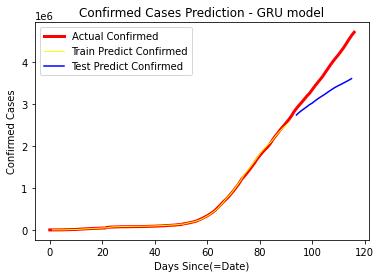

In [39]:
# shift train predictions for plotting
trainPredictPlot2 = numpy.empty_like(dataset)
trainPredictPlot2[:, :] = numpy.nan
trainPredictPlot2[look_back:len(trainPredict2)+look_back, :] = trainPredict2
# shift test predictions for plotting
testPredictPlot2 = numpy.empty_like(dataset)
testPredictPlot2[:, :] = numpy.nan
testPredictPlot2[len(trainPredict2)+(look_back*2)+1:len(dataset)-1, :] = testPredict2

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label="Actual Confirmed", color='red',linewidth=3)
plt.plot(trainPredictPlot2, label="Train Predict Confirmed", color='yellow', linewidth=1)
plt.plot(testPredictPlot2, label="Test Predict Confirmed", color='blue')
plt.legend()
print("Root Mean Squared Error for GRU model: ",testScore2)
plt.xlabel('Days Since(=Date)')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Prediction - GRU model")
plt.show()

### Facebook's Prophet Model for forecasting 

Facebook Prophet with First parameter setting

In [0]:
from fbprophet import Prophet

In [41]:
model_Prophet = Prophet(interval_width=0.95, weekly_seasonality=True, changepoint_prior_scale=2)
model_Prophet.add_seasonality(name="monthly", period=30.5, fourier_order=10, prior_scale=0.02)

In [0]:
train_data_length = round(len(covid_data)*0.8)
test_data_length = round(len(covid_data)*0.2)
prophet_training_set = pd.DataFrame(zip(list(covid_data.index[:train_data_length]),list(covid_data.Confirmed[:train_data_length])),columns=['ds','y'])

In [43]:
model_Prophet.fit(prophet_training_set)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast_c=model_Prophet.make_future_dataframe(freq="D",periods=test_data_length)

In [0]:
predicted_forecast = model_Prophet.predict(forecast_c)

In [46]:
print("Root Mean Squared Error for Prophet model: ",np.sqrt(mean_squared_error(covid_data.Confirmed[train_data_length:],predicted_forecast.yhat[train_data_length:].head(covid_data.shape[0]))))

Root Mean Squared Error for Prophet model:  90632.39179064985


Figure(720x432)
Root Mean Squared Error for Prophet model:  40237.055759866125


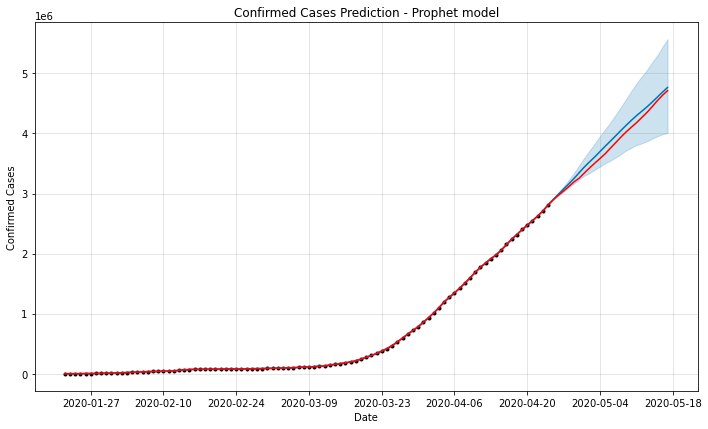

In [47]:
print(model_Prophet.plot(predicted_forecast))
df = pd.DataFrame(covid_data.Confirmed)
plt.plot(df, label="Test Predict Confirmed", color='red')

print("Root Mean Squared Error for Prophet model: ",np.sqrt(mean_squared_error(covid_data["Confirmed"],predicted_forecast['yhat'].head(covid_data.shape[0]))))
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Prediction - Prophet model")
plt.show()

Facebook Prophet with second parameter setting

In [48]:
model_Prophet_two = Prophet(interval_width=0.95,seasonality_mode="multiplicative")
model_Prophet_two.add_seasonality(name="weekly",period=7,fourier_order=20)

In [0]:
train_data_length = round(len(covid_data)*0.8)
test_data_length = round(len(covid_data)*0.2)
prophet_training_set_two = pd.DataFrame(zip(list(covid_data.index[:train_data_length]),list(covid_data.Confirmed[:train_data_length])),columns=['ds','y'])

In [50]:
model_Prophet_two.fit(prophet_training_set_two)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast_c_two=model_Prophet_two.make_future_dataframe(freq="D",periods=test_data_length)

In [0]:
predicted_forecast_two = model_Prophet_two.predict(forecast_c_two)

In [53]:
# model_scores.append(np.sqrt(mean_squared_error(covid_data.Confirmed[train_data_length:],predicted_forecast_two.yhat[train_data_length:].head(covid_data.shape[0]))))
print("Root Mean Squared Error for Prophet model: ",np.sqrt(mean_squared_error(covid_data.Confirmed[train_data_length:],predicted_forecast_two.yhat[train_data_length:].head(covid_data.shape[0]))))

Root Mean Squared Error for Prophet model:  30142.17955795914


Figure(720x432)
Root Mean Squared Error for Prophet model:  30142.17955795914


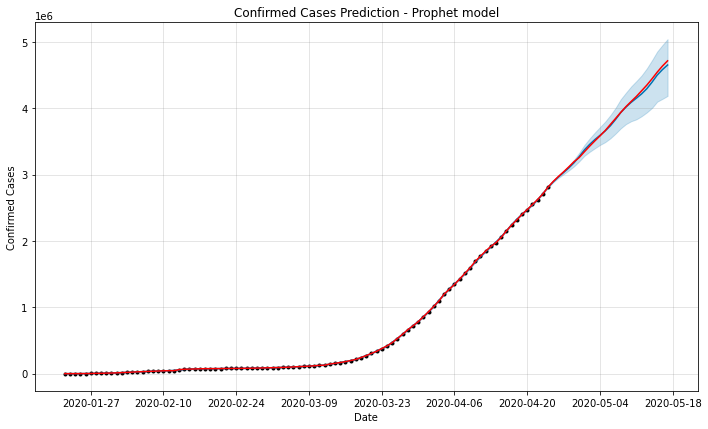

In [54]:
print(model_Prophet_two.plot(predicted_forecast_two))
df = pd.DataFrame(covid_data.Confirmed)
plt.plot(df, label="Test Predict Confirmed", color='red')

print("Root Mean Squared Error for Prophet model: ",np.sqrt(mean_squared_error(covid_data.Confirmed[train_data_length:],predicted_forecast_two.yhat[train_data_length:].head(covid_data.shape[0]))))
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Prediction - Prophet model")
plt.show()

Summarization of models. Which model fits the dataset most

In [55]:
model_scores = [ '%.2f' % elem for elem in model_scores ]
model_names=["Linear Regression","Polynomial Regression","LSTM model","GRU model","Facebook Prophet"]
model_summary=pd.DataFrame(zip(model_names,model_scores),columns=["Model Name","Root Mean Squared Error"])
model_summary

,Model Name,Root Mean Squared Error
0,Linear Regression,1772046.96
1,Polynomial Regression,687970.12
2,LSTM model,340920.33
3,GRU model,587205.88


### TASK2

Taking the better parameter setting to predict the future (We assume that the model is valid to be used for prediction of next few hundred days)

Situation of COVID19 on Fall Semester and Predict whether it is possible to take an offline class

In [0]:
model=Prophet(interval_width=0.95,seasonality_mode="multiplicative",daily_seasonality=False,weekly_seasonality=False,yearly_seasonality=False).add_seasonality(name="weekly",period=7,fourier_order=20)
actual_confirmed=pd.DataFrame(zip(list(covid_data.index),list(covid_data["Confirmed"])),columns=['ds','y'])

In [57]:
model.fit(actual_confirmed)

In [0]:
forecast_c=model.make_future_dataframe(freq="D",periods=115)
forecast_confirmed=forecast_c.copy()

In [0]:
confirmed_forecast=model.predict(forecast_c)
#print(confirmed_forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']])

yhat : the predicted forecast    
yhat_lower : the lower border of the prediction     
yhat_upper : the upper border of the prediction

Figure(720x432)


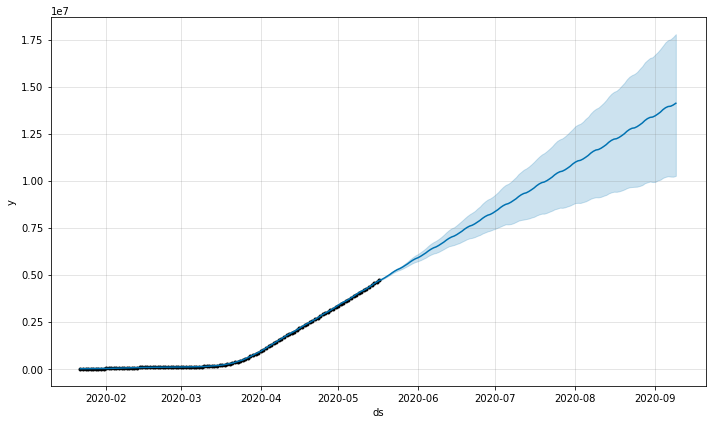

In [60]:
print(model.plot(confirmed_forecast))

Figure(648x432)


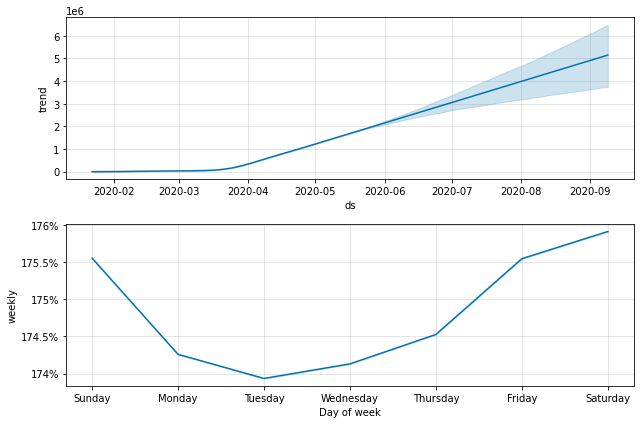

In [61]:
print(model.plot_components(confirmed_forecast))

The day when the active cases start to decrease

In [0]:
active_model=Prophet(interval_width=0.95,seasonality_mode="multiplicative",daily_seasonality=False,weekly_seasonality=False,yearly_seasonality=False).add_seasonality(name="weekly",period=7,fourier_order=20)
actual_active=pd.DataFrame(zip(list(covid_data.index),list(covid_data["Active Cases"])),columns=['ds','y'])

In [63]:
active_model.fit(actual_active)

In [0]:
forecast_a=active_model.make_future_dataframe(freq="D",periods=250)
forecast_active=forecast_a.copy()

In [0]:
active_forecast=active_model.predict(forecast_a)

The active case of corona will be reduced after: 2020-07-04


Text(0, 0.5, 'Active Cases')

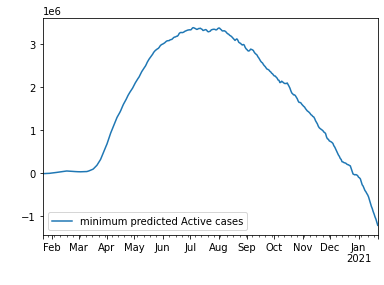

In [66]:
for index,row in active_forecast.iterrows():
  if row[2] == active_forecast["yhat_lower"].max():
    print("The active case of corona will be reduced after:",row[0].date())
    break

active_forecast.plot(x='ds',y='yhat_lower',label="minimum predicted Active cases")
plt.xlabel('date',color="white")
plt.ylabel('Active Cases',color="white")

Predicting the end date of corona virus

In [0]:
active_model=Prophet(interval_width=0.95,seasonality_mode="multiplicative",daily_seasonality=False,weekly_seasonality=False,yearly_seasonality=False).add_seasonality(name="weekly",period=7,fourier_order=20)
actual_active=pd.DataFrame(zip(list(covid_data.index),list(covid_data["Active Cases"])),columns=['ds','y'])

In [68]:
active_model.fit(actual_active)

In [0]:
forecast_a=active_model.make_future_dataframe(freq="D",periods=250)
forecast_active=forecast_a.copy()

In [0]:
active_forecast=active_model.predict(forecast_a)

Figure(720x432)


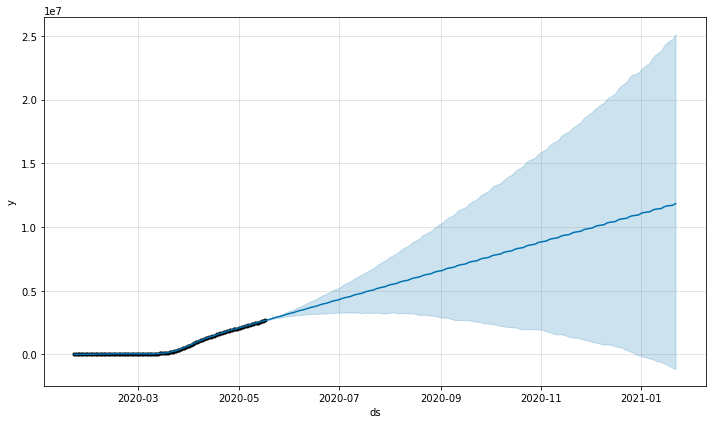

In [71]:
print(active_model.plot(active_forecast))

In [0]:
from datetime import datetime

In [73]:
averageDateTime = 0.0
for i in range(0,15):
  active_model=Prophet(interval_width=0.95,seasonality_mode="multiplicative",daily_seasonality=False,weekly_seasonality=False,yearly_seasonality=False).add_seasonality(name="weekly",period=7,fourier_order=20)
  actual_active=pd.DataFrame(zip(list(covid_data.index),list(covid_data["Active Cases"])),columns=['ds','y'])
  active_model.fit(actual_active)
  forecast_a=active_model.make_future_dataframe(freq="D",periods=250)
  active_forecast=active_model.predict(forecast_a)
  for index,row in active_forecast[::-1].iterrows():
    if row["yhat_lower"] > 0:
      averageDateTime += datetime.timestamp(row["ds"])
      print(datetime.fromtimestamp(averageDateTime/(i+1)))
      break

averageDate = datetime.fromtimestamp(averageDateTime/25)
print("Date of active cases goes to Zero", averageDate)

2021-01-14 00:00:00
2021-01-18 00:00:00
2021-01-10 08:00:00
2021-01-11 12:00:00
2021-01-04 14:24:00
2021-01-02 12:00:00
2021-01-03 00:00:00
2021-01-05 00:00:00
2021-01-06 21:20:00
2021-01-07 09:36:00
2021-01-06 02:10:54.545455
2021-01-05 06:00:00
2021-01-04 14:46:09.230769
2021-01-05 20:34:17.142857
2021-01-06 03:12:00
Date of active cases goes to Zero 2000-08-10 21:07:12


###Task3 - logistic regression **model**

In [0]:
import math
import time
import re
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [75]:
logCovid=pd.read_csv("/content/drive/My Drive/project/data/COVID19_open_line_list.csv")
logCovid = logCovid[["sex","age","country","province","outcome"]]
logCovid = logCovid.rename(columns={"outcome": "death"})

for index in range(0,len(logCovid)):
  if logCovid.death[index] == "died":
    logCovid.death[index] = 1
  else:
    logCovid.death[index] = 0

for index in range(0,len(logCovid)):
  matchage = re.match(r'(.*)-.*', str(logCovid.age[index]))
  if matchage:
    age = int(matchage.group(1)) + 5
    logCovid.age[index] = age

logCovid = logCovid.dropna()
logCovid["sex"] = logCovid["sex"].str.lower()
logCovid["age"] = logCovid["age"].astype(float).astype(int)
logCovid["country"] = logCovid["country"].str.lower()
logCovid["province"] = logCovid["province"].str.lower()
logCovid

,sex,age,country,province,death
0,male,30,china,anhui,0
1,male,47,china,anhui,0
2,male,49,china,anhui,0
3,female,47,china,anhui,0
4,female,50,china,anhui,0
...,...,...,...,...,...
13167,male,65,japan,hokkaido,0
13168,male,55,japan,ishikawa,0
13169,male,65,japan,aichi prefecture,0
13170,female,45,japan,osaka,0


In [76]:
plsCovid=pd.read_csv("/content/drive/My Drive/project/data/COVID19_line_list_data.csv")
plsCovid = plsCovid[["gender","age","country","location","death"]]
plsCovid = plsCovid.rename(columns={"outcome": "death","gender":"sex","location":"province"})
plsCovid = plsCovid.dropna()
plsCovid["sex"] = plsCovid["sex"].str.lower()
plsCovid["age"] = plsCovid["age"].astype(int)
plsCovid["country"] = plsCovid["country"].str.lower()
plsCovid["province"] = plsCovid["province"].str.lower()
plsCovid

,sex,age,country,province,death
0,male,66,china,"shenzhen, guangdong",0
1,female,56,china,shanghai,0
2,male,46,china,zhejiang,0
3,female,60,china,tianjin,0
4,male,58,china,tianjin,0
...,...,...,...,...,...
1027,male,58,spain,andalusia,0
1029,female,27,spain,zaragoza,0
1030,female,25,sweden,jonkoping,0
1052,female,45,lebanon,lebanon,0


In [77]:
korCovid = pd.read_csv("/content/drive/My Drive/project/data/PatientInfo.csv")
korCovid = korCovid[["sex","birth_year","age","country","province","state"]]
korCovid = korCovid.rename(columns={"state": "death"})

for index in range(0,len(korCovid)):
  if (korCovid.death[index] == 'deceased'):
    korCovid.death[index] = 1
  else:
    korCovid.death[index] = 0

  if math.isnan(korCovid.birth_year[index]) == False:
    korCovid.age[index] = (2020 - korCovid.birth_year[index])
  elif pd.isnull(korCovid.age[index]) == False:
    matchAge = re.match(r'(.*)s', korCovid.age[index])
    age = int(matchAge.group(1)) + 5
    korCovid.age[index] = age

korCovid = korCovid.drop(columns = ["birth_year"])
korCovid = korCovid.dropna()
korCovid["sex"] = korCovid["sex"].str.lower()
korCovid["age"] = korCovid["age"].astype(int)
korCovid["country"] = korCovid["country"].str.lower()
korCovid["province"] = korCovid["province"].str.lower()
korCovid

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying

,sex,age,country,province,death
0,male,56,korea,seoul,0
1,male,33,korea,seoul,0
2,male,56,korea,seoul,0
3,male,29,korea,seoul,0
4,female,28,korea,seoul,0
...,...,...,...,...,...
3514,female,25,korea,jeju-do,0
3515,male,35,korea,jeju-do,0
3516,female,25,korea,jeju-do,0
3517,female,15,china,jeju-do,0


In [78]:
frames = [korCovid,logCovid,plsCovid]
totalData = pd.concat(frames)
print(len(totalData))
totalData.head()

5203


,sex,age,country,province,death
0,male,56,korea,seoul,0
1,male,33,korea,seoul,0
2,male,56,korea,seoul,0
3,male,29,korea,seoul,0
4,female,28,korea,seoul,0


In [0]:
totalSex = pd.get_dummies(totalData.sex)
totalCountry = pd.get_dummies(totalData.country)
totalProvince = pd.get_dummies(totalData.province)

In [80]:
features = pd.concat([totalSex,totalData.age,totalCountry,totalProvince],axis='columns')
features = features.fillna(0)
features

,female,male,age,afghanistan,australia,bangladesh,cambodia,canada,china,finland,foreign,france,germany,greece,hong kong,indonesia,italy,japan,korea,lebanon,malaysia,mongolia,nepal,pakistan,philippines,phillipines,romania,singapore,south korea,spain,sri lanka,sweden,switzerland,taiwan,thailand,uae,uk,united states,usa,vietnam,...,shanxi (陕西),"shenzhen, guangdong",shizuoka,sichuan,sihanoukville,sindh,singapore,south australia,south korea,southern finland,sri lanka,strasbourg,taiwan,tenerife,thailand,thanh hoa,tianjin,tibet,tokyo,toronto,tsing yi,tubingen,uae,ulsan,valencia,vancouver,veneto,victoria,vinh phuc,wakayama prefecture,wan chai,washington,wilayah persekutuan kuala lumpur,"wuhan, hubei",xinjiang,yau ma tei,yunnan,zaragoza,zhejiang,zhuhai
0,0,1,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,0,1,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1029,1,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1030,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1052,1,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
x = features
y = pd.DataFrame(totalData.death)
for index in range(0,len(y)):
  if len(str(y.death.iloc[index])) > 1:
    y.death.iloc[index] = 1
y.death = y.death.astype(int)
y

,death
0,0
1,0
2,0
3,0
4,0
...,...
1027,0
1029,0
1030,0
1052,0


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9,random_state=4211)

In [83]:
timeT = np.zeros(shape=(9,3))
accur = np.zeros(shape=(9,3))
score = np.zeros(shape=(9,3))
totalMeanTime = []
totalMeanAccuracy = []
totalMeanScore = []
randomIndex = 0
for j in range(0,9):
    for i in range(0,3):
        model = SGDClassifier(loss='log', learning_rate='invscaling', eta0=0.7, random_state=randomIndex*100)
        randomIndex += 1
        start = time.time()
        model.fit(x_train,y_train)
        stop = time.time()
        timeTaken = stop - start
        y_predict = model.predict(x_test)
        accuracy = accuracy_score(y_test,y_predict)
        f1 = f1_score(y_test,y_predict)
        timeT[j][i] = timeTaken
        accur[j][i] = accuracy
        score[j][i] = f1
    meanTime = np.mean(timeT[j])
    meanAcc = np.mean(accur[j])
    meanScore = np.mean(score[j])
    stdTime = np.std(timeT[j])
    stdAcc = np.std(accur[j])
    stdScore = np.std(score[j])
    totalMeanTime.append(meanTime)
    totalMeanAccuracy.append(meanAcc)
    totalMeanScore.append(meanScore)
    print(j, ' Set')
    print("Mean time is: ", meanTime)
    print("Mean Accuracy is: ", meanAcc)
    print("Mean Score is: ", meanScore)
    print("Std of Time is: ", stdTime)
    print("Std of Accuracy is: ", stdAcc)
    print("Std of Score is: ", stdScore)
    print("\n")

print("Total Average MeanTime is: ", np.mean(totalMeanTime))
print("Total Average Accuracy is: ",np.mean(totalMeanAccuracy))
print("Total Average Mean Score is: ",np.mean(totalMeanScore))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0  Set
Mean time is:  0.308549960454305
Mean Accuracy is:  0.9852847088931541
Mean Score is:  0.2545454545454545
Std of Time is:  0.06535647147434823
Std of Accuracy is:  0.0009048071416334309
Std of Score is:  0.07713892158398698




/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



1  Set
Mean time is:  0.2638961474100749
Mean Accuracy is:  0.9833653230966091
Mean Score is:  0.1692307692307692
Std of Time is:  0.05477259770796825
Std of Accuracy is:  0.0009048071416334832
Std of Score is:  0.1274851578939082




/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



2  Set
Mean time is:  0.2940255006154378
Mean Accuracy is:  0.984005118362124
Mean Score is:  0.1212121212121212
Std of Time is:  0.057057187719685876
Std of Accuracy is:  0.0018096142832669142
Std of Score is:  0.1714198257421933




/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



3  Set
Mean time is:  0.25482455889383954
Mean Accuracy is:  0.9801663467690339
Mean Score is:  0.16666666666666666
Std of Time is:  0.04448150769888168
Std of Accuracy is:  0.005037752958420849
Std of Score is:  0.1247219128924647




/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



4  Set
Mean time is:  0.2688177426656087
Mean Accuracy is:  0.9756877799104288
Mean Score is:  0.12
Std of Time is:  0.05244495242760485
Std of Accuracy is:  0.01133720098955173
Std of Score is:  0.08640987597877146




/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



5  Set
Mean time is:  0.31960328420003253
Mean Accuracy is:  0.9776071657069738
Mean Score is:  0.2831168831168831
Std of Time is:  0.055176206511929234
Std of Accuracy is:  0.011337200989551701
Std of Score is:  0.06682950820918755




/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



6  Set
Mean time is:  0.2742448647816976
Mean Accuracy is:  0.9833653230966091
Mean Score is:  0.1111111111111111
Std of Time is:  0.013453323798758118
Std of Accuracy is:  0.0009048071416334832
Std of Score is:  0.15713484026367722




/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



7  Set
Mean time is:  0.24144244194030762
Mean Accuracy is:  0.9321817018554063
Mean Score is:  0.0457516339869281
Std of Time is:  0.0339519829514688
Std of Accuracy is:  0.07147976418904319
Std of Score is:  0.06470258128504355




/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



8  Set
Mean time is:  0.2793571949005127
Mean Accuracy is:  0.9846449136276392
Mean Score is:  0.2323232323232323
Std of Time is:  0.042549834010738835
Std of Accuracy is:  0.001567171940360317
Std of Score is:  0.16474248919495038


Total Average MeanTime is:  0.27830685509575737
Total Average Accuracy is:  0.9762564868131087
Total Average Mean Score is:  0.16710643024368513


Using another logistic regression moel

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
model = LogisticRegression()

In [86]:
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
model.score(x_test,y_test)

0.9865642994241842

In [88]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [89]:
death_prediction = model.predict_proba(x_test)
death_probability = pd.DataFrame(death_prediction,columns=["Prob.Alive","Prob.Death"])
death_probability


,Prob.Alive,Prob.Death
0,0.994962,0.005038
1,0.986235,0.013765
2,0.809418,0.190582
3,0.999782,0.000218
4,0.975492,0.024508
...,...,...
516,0.997465,0.002535
517,0.999547,0.000453
518,0.998004,0.001996
519,0.989836,0.010164


In [90]:
features

,female,male,age,afghanistan,australia,bangladesh,cambodia,canada,china,finland,foreign,france,germany,greece,hong kong,indonesia,italy,japan,korea,lebanon,malaysia,mongolia,nepal,pakistan,philippines,phillipines,romania,singapore,south korea,spain,sri lanka,sweden,switzerland,taiwan,thailand,uae,uk,united states,usa,vietnam,...,shanxi (陕西),"shenzhen, guangdong",shizuoka,sichuan,sihanoukville,sindh,singapore,south australia,south korea,southern finland,sri lanka,strasbourg,taiwan,tenerife,thailand,thanh hoa,tianjin,tibet,tokyo,toronto,tsing yi,tubingen,uae,ulsan,valencia,vancouver,veneto,victoria,vinh phuc,wakayama prefecture,wan chai,washington,wilayah persekutuan kuala lumpur,"wuhan, hubei",xinjiang,yau ma tei,yunnan,zaragoza,zhejiang,zhuhai
0,0,1,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,0,1,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1029,1,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1030,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1052,1,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
new_row = {'age':38, 'female':1, 'korea':1,'gyeonggi-do':1}
mydataframe = features.append(new_row, ignore_index=True)
mydataframe = mydataframe.fillna(0)
death_prediction = model.predict_proba(mydataframe)
death_prediction[-1]

array([9.99577480e-01, 4.22519654e-04])